In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter
import re

In [3]:
myDataframe = pd.read_csv('carTrainData.csv')
names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "Class" ]
feature=["buying", "maint", "doors", "persons", "lug_boot", "safety"]

In [4]:
myDataframe = pd.DataFrame(myDataframe)
myDataframe = myDataframe.replace('vhigh',4)
myDataframe = myDataframe.replace('high',3)
myDataframe = myDataframe.replace('med',2)
myDataframe = myDataframe.replace('low',1)
myDataframe = myDataframe.replace('5more',6)
myDataframe = myDataframe.replace('more',5)
myDataframe = myDataframe.replace('small',1)
myDataframe = myDataframe.replace('med',2)
myDataframe = myDataframe.replace('big',3)
myDataframe = myDataframe.replace('unacc',1)
myDataframe = myDataframe.replace('acc',2)
myDataframe = myDataframe.replace('good',3)
myDataframe = myDataframe.replace('vgood',4)

In [5]:
df= myDataframe
df.data = myDataframe.iloc[:,:-1]
df.tar = myDataframe.iloc[:,-1]

In [6]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df.data, df.tar,test_size=0.2)

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df.data, df.tar)

In [8]:
#Enter your test dataset here
testFrame = pd.read_csv('carTestData.csv')

In [9]:
#Replacing categorical labels with integer values
testFrame = pd.DataFrame(testFrame)
testFrame = testFrame.replace('vhigh',4)
testFrame = testFrame.replace('high',3)
testFrame = testFrame.replace('med',2)
testFrame = testFrame.replace('low',1)
testFrame = testFrame.replace('5more',6)
testFrame = testFrame.replace('more',5)
testFrame = testFrame.replace('small',1)
testFrame = testFrame.replace('med',2)
testFrame = testFrame.replace('big',3)
testFrame = testFrame.replace('unacc',1)
testFrame = testFrame.replace('acc',2)
testFrame = testFrame.replace('good',3)
testFrame = testFrame.replace('vgood',4)

In [10]:
testFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
V1    55 non-null int64
V2    55 non-null int64
V3    55 non-null object
V4    55 non-null object
V5    55 non-null int64
V6    55 non-null int64
V7    55 non-null int64
dtypes: int64(5), object(2)
memory usage: 3.1+ KB


In [11]:
tf= testFrame
tf.data = testFrame.iloc[:,:-1]
tf.tar = testFrame.iloc[:,-1]

In [12]:
predict = clf.predict(tf.data)

In [13]:
import graphviz

In [14]:
dot_data=tree.export_graphviz(clf, out_file=None)

In [15]:
graph=graphviz.Source(dot_data)
target=['unacc','acc','good','vgood']

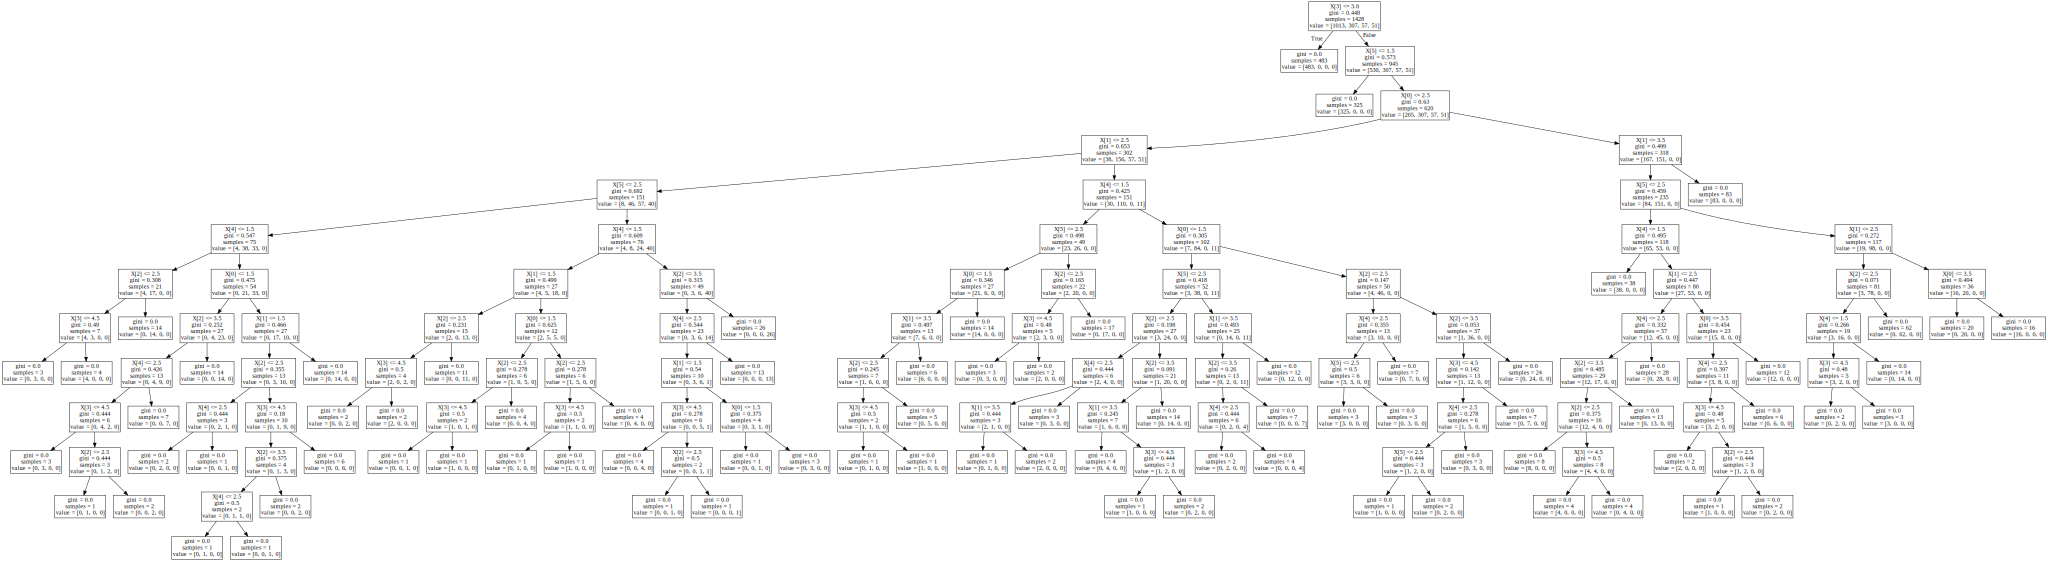

In [16]:
graph=graphviz.Source(dot_data)
graph

In [17]:
from sklearn.metrics import accuracy_score

print( "Train Accuracy is : ", accuracy_score(df.tar, clf.predict(df.data)))
print( "Test Accuracy  is : ", accuracy_score(tf.tar, clf.predict(tf.data)))

Train Accuracy is :  1.0
Test Accuracy  is :  0.890909090909


In [18]:
print( " Confusion matrix for train:")
print(confusion_matrix(df.tar, clf.predict(df.data)))
print( " Confusion matrix for test :")
print(confusion_matrix(tf.tar, clf.predict(tf.data)))

 Confusion matrix for train:
[[1013    0    0    0]
 [   0  307    0    0]
 [   0    0   57    0]
 [   0    0    0   51]]
 Confusion matrix for test :
[[26  1  1  0]
 [ 3  7  1  0]
 [ 0  0  9  0]
 [ 0  0  0  7]]
